In [3]:
import sys
import os

# Add the scripts/ folder to the Python path
sys.path.append(os.path.abspath("scripts"))

In [1]:
import joblib
from scripts.split_data import load_split_data
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    accuracy_score,
    f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.save_utils import save_fig

In [4]:
model_path = "models/tuned/xgboost_optuna_75_20250415_213741.joblib"
XGBoost_optuna_model = joblib.load(model_path)

In [5]:
DATA_PATH = "data/raw/Bank Customer Churn Prediction.csv"
_, X_test, _, y_test = load_split_data(DATA_PATH)

In [6]:
#Predict class labels
y_pred = XGBoost_optuna_model.predict(X_test)

#Predict probabilities for ROC/PR curves
y_prob = XGBoost_optuna_model.predict_proba(X_test)[:, 1]

In [7]:
report = classification_report(y_test, y_pred, target_names=["Not Churned", "Churned"])
print(report)

              precision    recall  f1-score   support

 Not Churned       0.88      0.96      0.92      1593
     Churned       0.75      0.50      0.60       407

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.85      2000



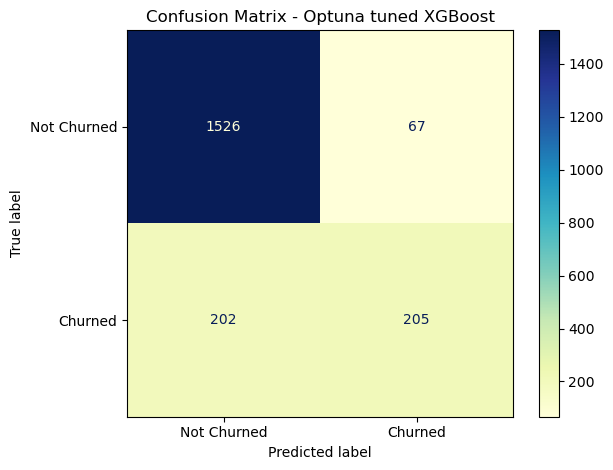

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Not Churned", "Churned"]).plot(cmap="YlGnBu")
plt.title("Confusion Matrix - Optuna tuned XGBoost")
plt.tight_layout()
plt.show()

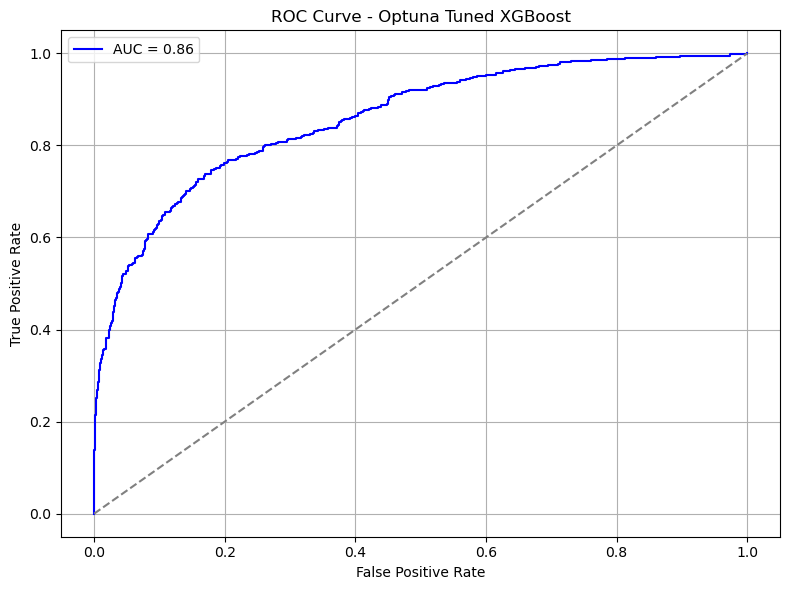

In [13]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Optuna Tuned XGBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

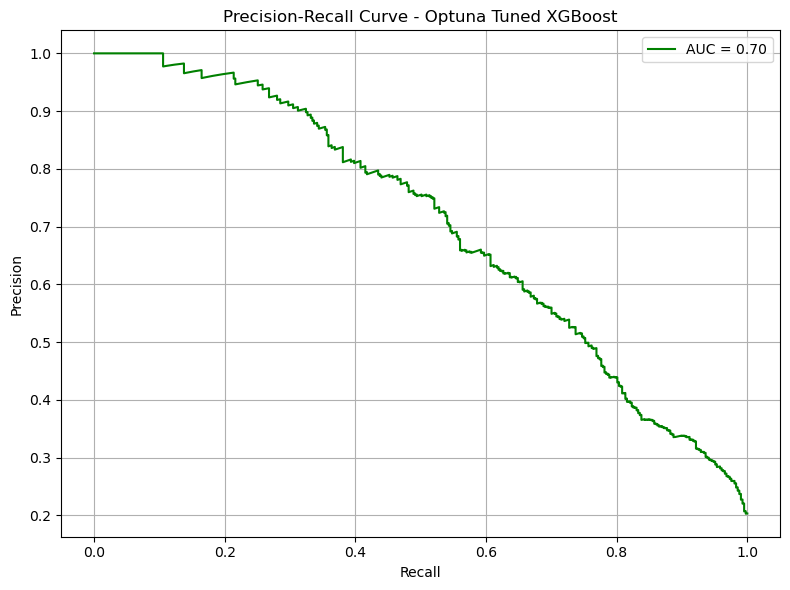

In [11]:
from sklearn.metrics import auc


precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"AUC = {pr_auc:.2f}", color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Optuna Tuned XGBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

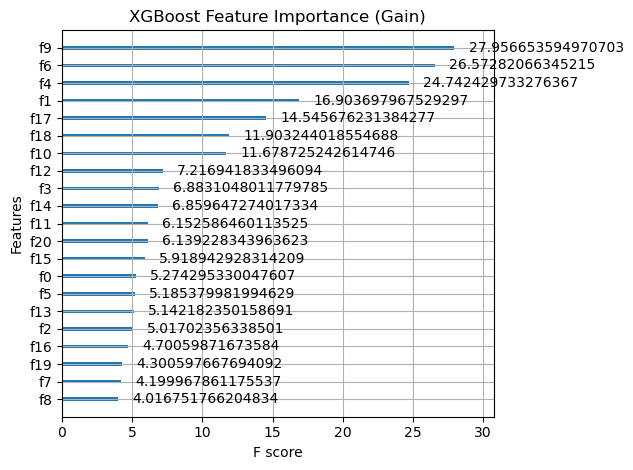

In [21]:
from xgboost import plot_importance

booster = XGBoost_optuna_model.named_steps["classifier"]
plt.figure(figsize=(10, 6))
plot_importance(booster, importance_type='gain')
plt.title("XGBoost Feature Importance (Gain)")
plt.tight_layout()
plt.show()


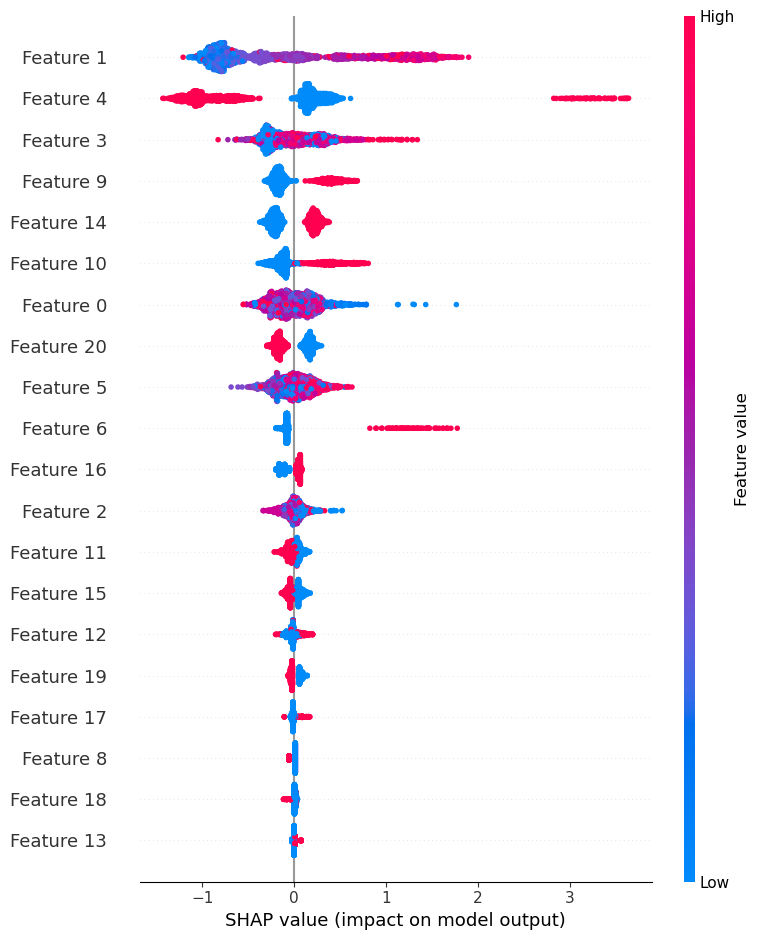

In [19]:
import shap

model = XGBoost_optuna_model.named_steps["classifier"]
X_test_transformed = XGBoost_optuna_model.named_steps["preprocessing"].transform(X_test)

explainer = shap.Explainer(model)
shap_values = explainer(X_test_transformed)

shap.summary_plot(shap_values, X_test_transformed)


In [26]:
inner_pipeline = XGBoost_optuna_model.named_steps["preprocessing"]

preproc = inner_pipeline.named_steps["preprocessor"]

feature_names = preproc.get_feature_names_out()

feature_map = {f"f{i}": name for i, name in enumerate(feature_names)}

for fx, real_name in feature_map.items():
    print(f"{fx} --> {real_name}")

f0 --> num__credit_score
f1 --> num__age
f2 --> num__tenure
f3 --> num__balance
f4 --> num__products_number
f5 --> num__estimated_salary
f6 --> num__is_old_inactive
f7 --> num__is_young_active
f8 --> num__is_high_balance_short_tenure
f9 --> num__is_low_product_inactive
f10 --> num__is_german_customer
f11 --> cat__country_France
f12 --> cat__country_Germany
f13 --> cat__country_Spain
f14 --> cat__gender_Female
f15 --> cat__gender_Male
f16 --> cat__age_category_middle
f17 --> cat__age_category_old
f18 --> cat__age_category_young
f19 --> passthrough__credit_card
f20 --> passthrough__active_member
